# Analysing and Predicting Customer Churn

###### -Harshul Varma

***

## Table of Content

[1.0 Introduction](#1)<br>
[2.0 Dataset](#dataset)<br>
&nbsp;&nbsp;[2.1 Loading Libraries](#2.1)<br>
&nbsp;&nbsp;[2.2 Loading Data](#2.2)<br>
&nbsp;&nbsp;[2.3 Cleaning and Preparing Data](#2.3)<br>
[3.0 Understanding Customer behaviour - Exploratory data analysis](#3.0)<br>
&nbsp;&nbsp;[3.1 Total Customer Churn](#3.1)<br>
&nbsp;&nbsp;[3.2 Demographic Data](#3.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.2.1 Gender](#3.2.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.2.2 Senior Citizen](#3.2.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.2.3 Partner and Dependents](#3.2.3)<br>
&nbsp;&nbsp;[3.3 Services and Add-ons](#3.3)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.3.1 Phone Line](#3.3.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.3.2 Internet Service](#3.3.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.3.3 Add-ons: Security, Backup, Support and Protection](#3.3.3)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.3.4 Add-ons: Streaming Services](#3.3.4)<br>
&nbsp;&nbsp;[3.4 Contract, Billing and Payment Method](#3.4)<br>
&nbsp;&nbsp;[3.5 Tenure and Charges](#3.5)<br>
[4.0 Predicting if a customer is likely to leave](#4.0)<br>
&nbsp;&nbsp;[4.1 Feature Engineering](#4.1)<br>
&nbsp;&nbsp;[4.2 Resampling Data](#4.2)<br>
&nbsp;&nbsp;[4.3 Model Selection and Evaluation](#4.3)<br>
&nbsp;&nbsp;[4.4 Predicting Customer Churn](#4.4)<br>
***

## 1.0 Introduction <a id='1'></a>

The goal of this notebook is to analyze telecommunication company customer data such as demographics, services, billing, and charges in order to determine customer churn behaviour and develop focused customer retention program.
***

## 2.0 Dataset <a id='2'></a>

The dataset consists of information about:
* Customers who left within last company stored in the column **Churn**.
* Demographics of the customer - Gender, Age range, Partner and Dependents information
* Services customer hassigned up for such as phone, internet, online security, online banking, streaming services etc.
* Customer account information such as billing method, contract, tenure, charges etc.

### 2.1 Loading Libraries <a id='2.1'></a>

In [1]:
#Loading libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, XGBRegressor
import shap

### 2.2 Loading Data <a id='2.2'></a>

In [2]:
df = pd.read_csv('D:/harsh/Old Desktop/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 2.3 Cleaning and Preparing Data <a id='2.3'></a>

Let's start by looking at how many unique entries are there in the data frame.

In [3]:
print('Number of unique customers: {}'.format(df['customerID'].nunique()))

Number of unique customers: 7043


The total charges column has a dtype of object, let's convert it into a float type.
The Senior Citizen columns consists of values 0 and 1, 0 meaning the customer is not a senior citizen and 1 meaning the customer is a senior citizen. I will change the column to Yes or No values to help in our data exploration
Finally our dataframe also has missing values. We will replace it with a value of '0'.

In [4]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors='coerce')
df["TotalCharges"] = df["TotalCharges"].astype(float)
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})
df = df.fillna(0)

I also want to create a palette we will use for visualising our data. The customer who churned will be displayed in Orange and customers who didn't churn will be in grey. The thought behind choosing the colours is so that a bright colour - 'orange' is easily visible and distinguishable on a dull colour - 'grey'. It also focuses the audiences' eyes to to where I want them to focus.

In [5]:
pal = dict(Yes="orange", No="darkgrey")

The dataframe is ready for analysis and prediction!
***

## 3.0 Understanding customer behaviour - Exploratory Data Analysis <a id='3.0'></a>

### 3.1 Total Customer Churn <a id='3.1'></a>

Text(0.5, 1.0, '26.5% customers left last month')

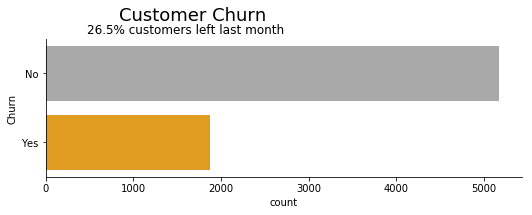

In [6]:
sns.catplot(kind ='count', y='Churn',data=df,height=2.5, aspect=3, palette=pal)
plt.suptitle('Customer Churn', y=1.1, fontsize=18,ha='right')
plt.title('26.5% customers left last month', fontsize=12,ha='right')

### 3.2 Demographic data <a id='3.2'></a>

In [7]:
#Creating a dataframe for demographic data
cat = df.drop(columns=['tenure','PhoneService','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','MultipleLines','OnlineBackup'])

#### 3.2.1 Gender <a id='3.2.1'></a>

Text(0.5, 1.0, 'Gender does not affect churn')

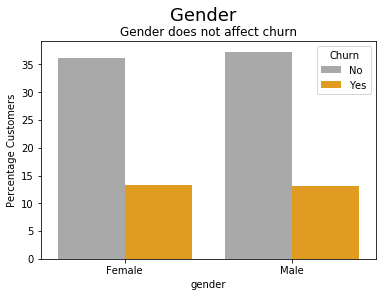

In [8]:
gender = cat.groupby(['gender','Churn']).customerID.agg('count').to_frame('count').reset_index()
gender['Percentage Customers'] = (gender['count']/sum(gender['count'])*100).round(1)
sns.barplot(x='gender',y='Percentage Customers',hue='Churn',data=gender,palette=pal)
plt.suptitle('Gender', y=1, fontsize=18,ha='center')
plt.title('Gender does not affect churn', fontsize=12,ha='center')

#### 3.2.2 Senior Citizens <a id='3.2.2'></a>

In [9]:
senior = cat.groupby(['SeniorCitizen','Churn']).customerID.agg('count').to_frame('count').reset_index()
senior['Percentage Customers'] = (senior['count']/sum(senior['count'])*100).round(1)
senioryes = senior[senior['SeniorCitizen']=='Yes']
senioryes['Percentage Customers of Senior Citizens'] = (senioryes['count']/sum(senioryes['count'])*100).round(1)

C:\Users\harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


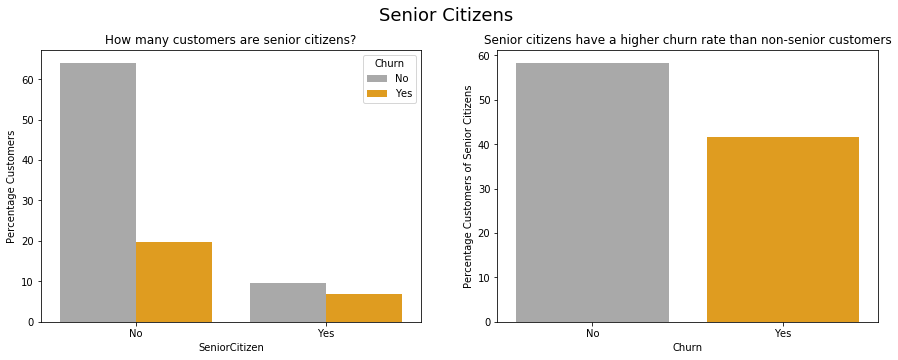

In [10]:
fig, axis = plt.subplots(1, 2, figsize=(15,5))

plt.suptitle('Senior Citizens', y=1, fontsize=18,ha='center')

axis[0].set_title("How many customers are senior citizens?",fontsize=12)
axis[1].set_title("Senior citizens have a higher churn rate than non-senior customers",fontsize=12)

ax = sns.barplot(x='SeniorCitizen',y='Percentage Customers',hue='Churn',data=senior,palette=pal,ax=axis[0])

ax = sns.barplot(x= 'Churn' , y='Percentage Customers of Senior Citizens',data=senioryes,palette=pal, ax=axis[1])

#### 3.2.3 Partner and Dependents <a id='3.2.3'></a>

In [11]:
partner = cat.groupby(['Partner','Dependents','Churn']).customerID.agg('count').to_frame('count').reset_index()
partner['Percentage Customers'] = ((partner['count']/sum(partner['count']))*100).round(1)
haspartner = partner[partner['Partner']=='Yes']
nopartner = partner[partner['Partner']=='No']

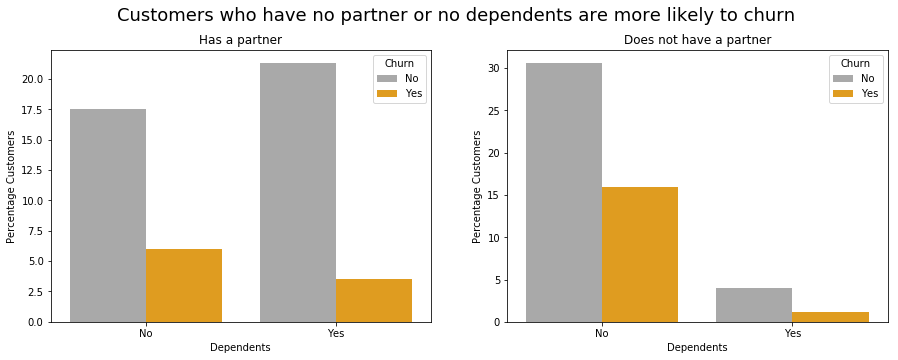

In [12]:
fig, axis = plt.subplots(1, 2, figsize=(15,5))

plt.suptitle('Customers who have no partner or no dependents are more likely to churn', y=1, fontsize=18,ha='center')


axis[0].set_title("Has a partner")
axis[1].set_title("Does not have a partner")

ax = sns.barplot(x='Dependents',y='Percentage Customers',hue='Churn',data=haspartner,palette=pal,ax=axis[0])

ax = sns.barplot(x='Dependents',y='Percentage Customers',hue='Churn',data=nopartner,palette=pal,ax=axis[1])

### 3.3 Services and Add-ons <a id='3.3'></a>

In [13]:
#Creating a dataframe for services
service = df.drop(columns=['gender','SeniorCitizen','Partner','Dependents','tenure','MonthlyCharges','TotalCharges'])

#### 3.3.1 Phone Line <a id='3.3.1'></a>

In [14]:
lines = service.groupby(['MultipleLines','Churn']).customerID.agg('count').to_frame('count').reset_index()
lines['Percentage Customers'] = ((lines['count']/sum(lines['count']))*100).round(1)

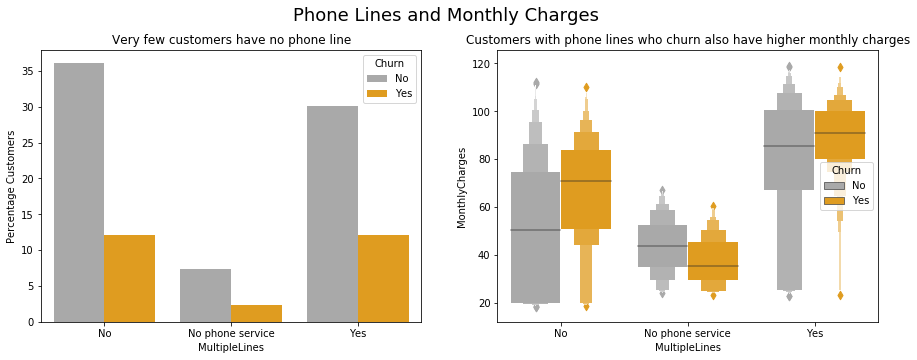

In [15]:
fig, axis = plt.subplots( 1,2, figsize=(15,5))

plt.suptitle('Phone Lines and Monthly Charges', y=1, fontsize=18,ha='center')


axis[0].set_title("Very few customers have no phone line")

axis[1].set_title("Customers with phone lines who churn also have higher monthly charges")

ax = sns.barplot(x='MultipleLines',y='Percentage Customers',hue='Churn',data=lines,palette=pal,ax=axis[0])

ax = sns.boxenplot(x="MultipleLines", y="MonthlyCharges", hue="Churn", palette=pal,data=df,ax=axis[1],order=['No','No phone service','Yes'])

#### 3.3.2 Internet service <a id='3.3.2'></a>

In [16]:
internet = service.groupby(['InternetService','Churn']).customerID.agg('count').to_frame('count').reset_index()
internet['Percentage Customers'] = ((internet['count']/sum(internet['count']))*100).round(1)

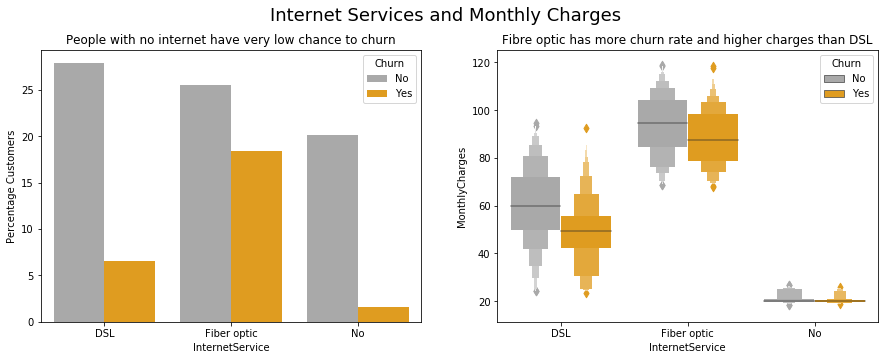

In [17]:
fig, axis = plt.subplots( 1,2, figsize=(15,5))
plt.suptitle('Internet Services and Monthly Charges', y=1, fontsize=18,ha='center')


axis[0].set_title("People with no internet have very low chance to churn")
axis[1].set_title("Fibre optic has more churn rate and higher charges than DSL")

ax = sns.barplot(x='InternetService',y='Percentage Customers',hue='Churn',data=internet,palette=pal,ax=axis[0])

ax = sns.boxenplot(x="InternetService", y="MonthlyCharges", hue="Churn", palette=pal,data=df,ax=axis[1])

#### 3.3.3 Add-ons: Security, Backup, Support and Protection <a id='3.3.3'></a>

In [18]:
#Function to create dataframe for each service and number of customers who churn
def create_service_df(additional):
    data = service.groupby([additional,'Churn']).customerID.agg('count').to_frame('count').reset_index()
    data = data[data[additional]!='No internet service']
    data = data[data[additional]=='Yes']
    data = data.drop(columns=[additional])
    #data = data.set_index('Churn')
    data.columns = ['Churn',additional]
    return data

In [19]:
os = create_service_df(additional='OnlineSecurity')
ob = create_service_df(additional='OnlineBackup')
dp = create_service_df(additional='DeviceProtection')
ts = create_service_df(additional='TechSupport')

In [20]:
addon = pd.merge(os,ob,on='Churn')
addon = pd.merge(addon,ts,on='Churn')
addon = pd.merge(addon,dp,on='Churn')
addon = addon.set_index('Churn').T
addon = addon.reset_index()
addon.columns = ['Service','No Churn','Churn']
addon['No Churn'] = ((addon['No Churn']/len(df))*100).round(1)
addon['Churn'] = ((addon['Churn']/len(df))*100).round(1)

[Text(0, 0.5, 'Percentage of Total Customers'), Text(0.5, 0, 'Service')]

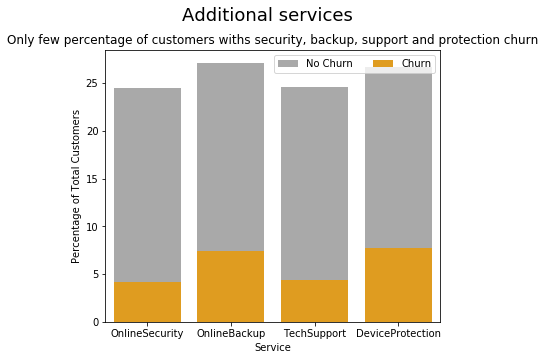

In [21]:
f, ax = plt.subplots(figsize=(6, 5))

plt.suptitle('Additional services', y=1, fontsize=18,ha='center')
plt.title('Only few percentage of customers withs security, backup, support and protection churn', fontsize=12,ha='center')

sns.barplot(x='Service',y="No Churn", data=addon,
            label="No Churn", color="darkgrey")

sns.barplot(x='Service',y="Churn", data=addon,
            label="Churn", color="orange")

ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylabel="Percentage of Total Customers",xlabel="Service")


#### 3.3.4 Add-ons: Streaming services <a id='3.3.4'></a>

In [22]:
stv = create_service_df(additional='StreamingTV')
sm = create_service_df(additional='StreamingMovies')
streaming = pd.merge(stv,sm,on='Churn')
streaming = streaming.set_index('Churn').T
streaming = streaming.reset_index()
streaming.columns = ['Service','No Churn','Churn']
streaming['No Churn'] = ((streaming['No Churn']/len(df))*100).round(1)
streaming['Churn'] = ((streaming['Churn']/len(df))*100).round(1)

[Text(0, 0.5, 'Number of Customers'), Text(0.5, 0, 'Service')]

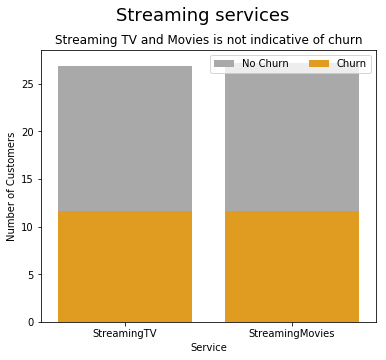

In [23]:
f, ax = plt.subplots(figsize=(6, 5))

plt.suptitle('Streaming services', y=1, fontsize=18,ha='center')
plt.title('Streaming TV and Movies is not indicative of churn', fontsize=12,ha='center')

sns.barplot(x='Service',y="No Churn", data=streaming,
            label="No Churn", color="darkgrey")

sns.barplot(x='Service',y="Churn", data=streaming,
            label="Churn", color="orange")

ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylabel="Number of Customers",xlabel="Service")

### 3.4 Contract, Billing and Payment method <a id='3.4'></a>

In [24]:
#creating dataframe for payments
pay = df.drop(columns=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'])

In [25]:
contract = pay.groupby(['PaperlessBilling','PaymentMethod','Contract','Churn']).customerID.agg('count').to_frame('count').reset_index()
contract['Percentage Customers'] = ((contract['count']/sum(contract['count']))*100).round(1)
paper = contract[contract['PaperlessBilling']=='No']
nopaper = contract[contract['PaperlessBilling']=='Yes']

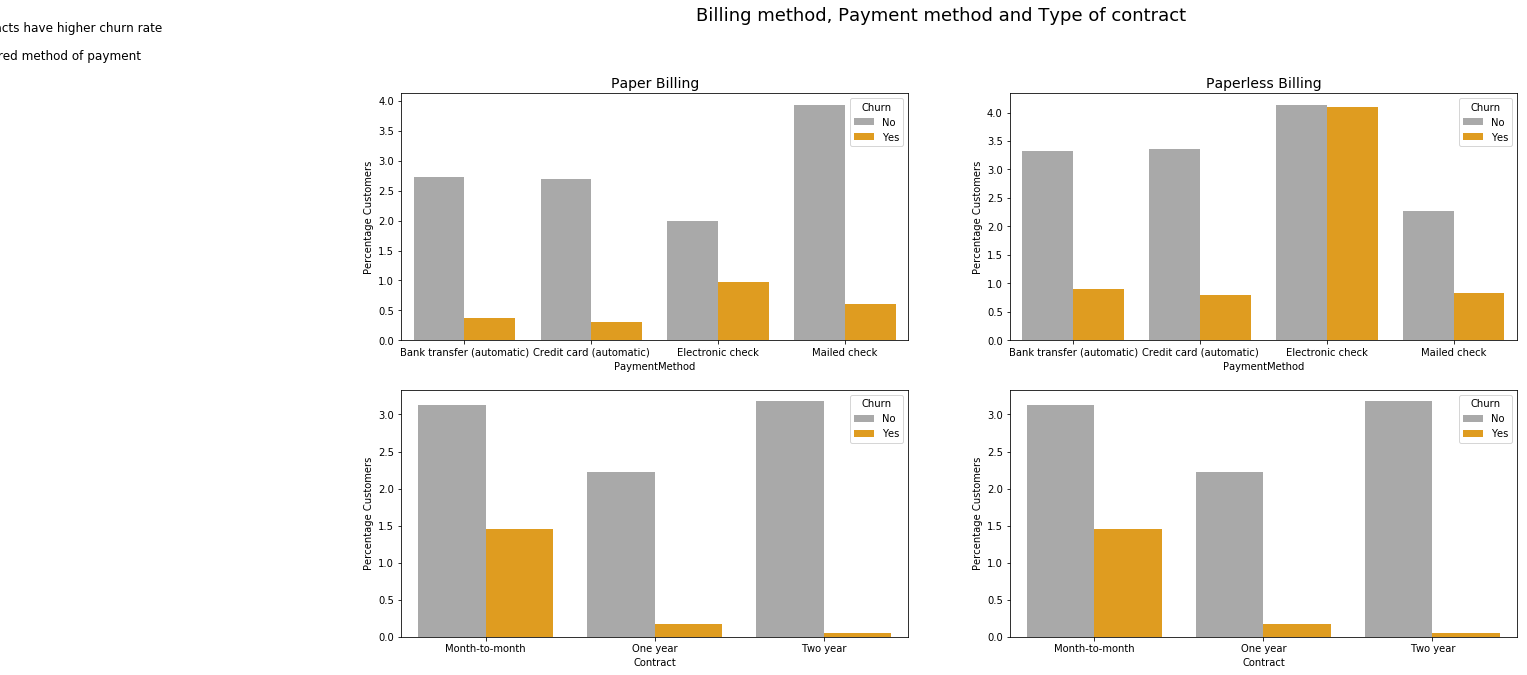

In [26]:
fig, axis = plt.subplots(2, 2, figsize=(20,10))

plt.suptitle('Billing method, Payment method and Type of contract', y=1, fontsize=18,ha='center')

axis[0,0].set_title("Paper Billing",fontsize=14)
axis[0,1].set_title("Paperless Billing",fontsize=14)

fig.text(-0.8,2.2, 'Paperless billing and Shorter contracts have higher churn rate',fontsize=12, transform=ax.transAxes)
fig.text(-0.8,2.1, 'Electronic Check is the most preferred method of payment',fontsize=12, transform=ax.transAxes)



ax = sns.barplot(x='PaymentMethod',y='Percentage Customers',hue='Churn',data=paper,palette=pal,ax=axis[0,0],ci=None)

ax = sns.barplot(x='PaymentMethod',y='Percentage Customers',hue='Churn',data=nopaper,palette=pal,ax=axis[0,1],ci=None)

ax = sns.barplot(x='Contract',y='Percentage Customers',hue='Churn',data=paper,palette=pal,ax=axis[1,0],ci=None)

ax = sns.barplot(x='Contract',y='Percentage Customers',hue='Churn',data=paper,palette=pal,ax=axis[1,1],ci=None)


Text(0.5, 1, 'Mailed check has higher charges for customers who churn')

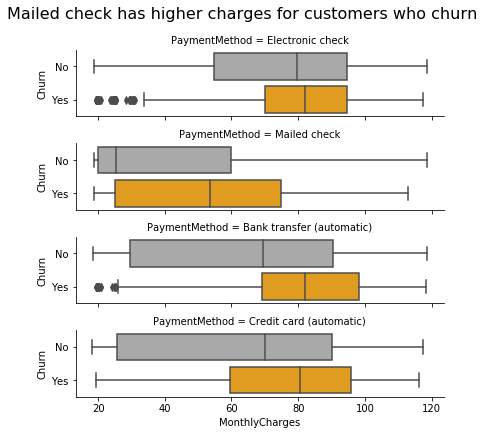

In [27]:
g = sns.catplot(y="Churn", x="MonthlyCharges", row="PaymentMethod", kind="box", data=pay, height=1.5, aspect=4, orient='h',palette=pal)

plt.subplots_adjust(top=0.9)

g.fig.suptitle('Mailed check has higher charges for customers who churn', y=1, fontsize=16,ha='center')

Text(0.5, 1, 'Churn increase with contract length')

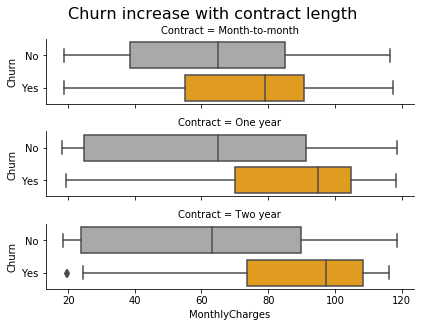

In [28]:
g = sns.catplot(y="Churn", x="MonthlyCharges", row="Contract", kind="box", data=pay, height=1.5, aspect=4, orient='h',palette=pal)

plt.subplots_adjust(top=0.9)

g.fig.suptitle('Churn increase with contract length', y=1, fontsize=16,ha='center')

### 3.5 Tenure and Charges <a id='3.5'></a>

Text(0.5, 1, 'Charges and tenure have a linear relationship')

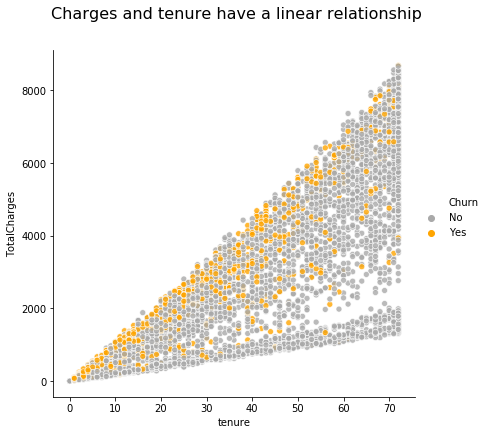

In [29]:
g = sns.relplot(x="tenure", y="TotalCharges",hue="Churn",data=pay,palette=pal,height=6,alpha=0.8)

plt.subplots_adjust(top=0.9)

g.fig.suptitle('Charges and tenure have a linear relationship', y=1, fontsize=16,ha='center') 

Text(0.5, 1, 'People with shorter tenure and higher monthly charges are more likely to churn')

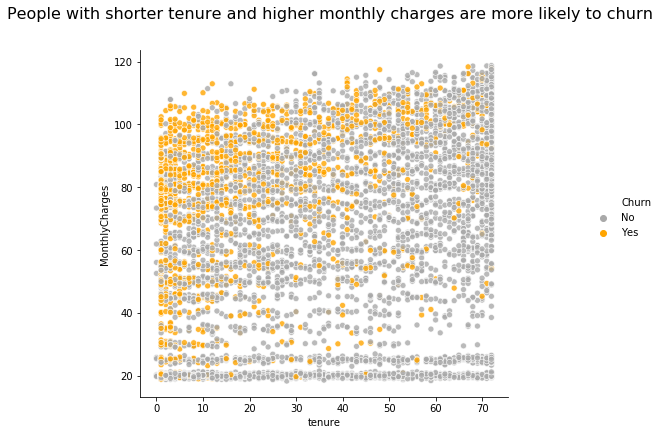

In [30]:
g = sns.relplot(x="tenure", y="MonthlyCharges",hue="Churn",data=pay,palette=pal,height=6,alpha=0.8)

plt.subplots_adjust(top=0.9)

g.fig.suptitle('People with shorter tenure and higher monthly charges are more likely to churn', y=1, fontsize=16,ha='center') 

In [31]:
ranges = [0,20,40,60,80]
pay['tenure ranges'] = pd.cut(pay['tenure'],ranges)

Text(0.5, 1, 'Customers with longer tenure have higher Monthly and Total Charges')

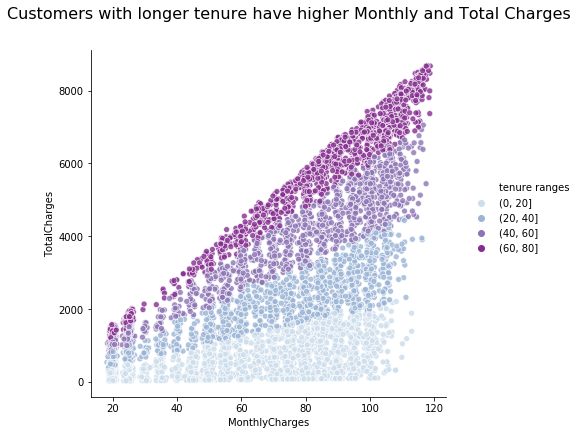

In [32]:
g = sns.relplot(x="MonthlyCharges", y="TotalCharges",hue="tenure ranges",data=pay,height=6,alpha=0.8,palette='BuPu')
plt.subplots_adjust(top=0.9)

g.fig.suptitle('Customers with longer tenure have higher Monthly and Total Charges', y=1, fontsize=16,ha='center') 


***

## 4.0 Predicting if a customer is likely to leave <a id='4.0'></a>

In this section I will build a model to predict customer churn. I will use feature engineering and evaluate my model and finally use it to make predictions.

Firstly I will create a one-hot dataframe from the initial dataframe in order to use machine learning model.
From the EDA section, the features that did not show much impact on churn are also dropped.

In [33]:
df_dummies = df.drop(columns=['customerID','StreamingTV','StreamingMovies','gender'])
df_dummies['Churn'] = df_dummies['Churn'].replace({'No': 0, 'Yes': 1})
df_dummies = pd.get_dummies(df_dummies)

### 4.1 Feature Engineering <a id='4.1'></a>

In order to feature engineer to increase accuracy of the model, we can remove the highly related features.
To do that, we calculate the pearson correlation and anything above a threshold of 0.95 correlation is dropped

In [34]:
corr = df_dummies.corr()
corr = corr.abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)
df_dummies = df_dummies.drop(df_dummies[to_drop], axis=1)

['SeniorCitizen_Yes', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'PaperlessBilling_Yes']


Finally a features dataframe - 'x' and target dataframes - 'y' are created

In [35]:
x = df_dummies.drop(columns=['Churn'])
y = df_dummies['Churn'].values

Visualising feature importance using a random forest classifier

In [36]:
tree = RandomForestClassifier()
result = tree.fit(x,y)
imp = tree.feature_importances_

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [37]:
imp = pd.DataFrame({'feature': x.columns, 'imp': tree.feature_importances_})
imp = imp.sort_values(by='imp',ascending=False)

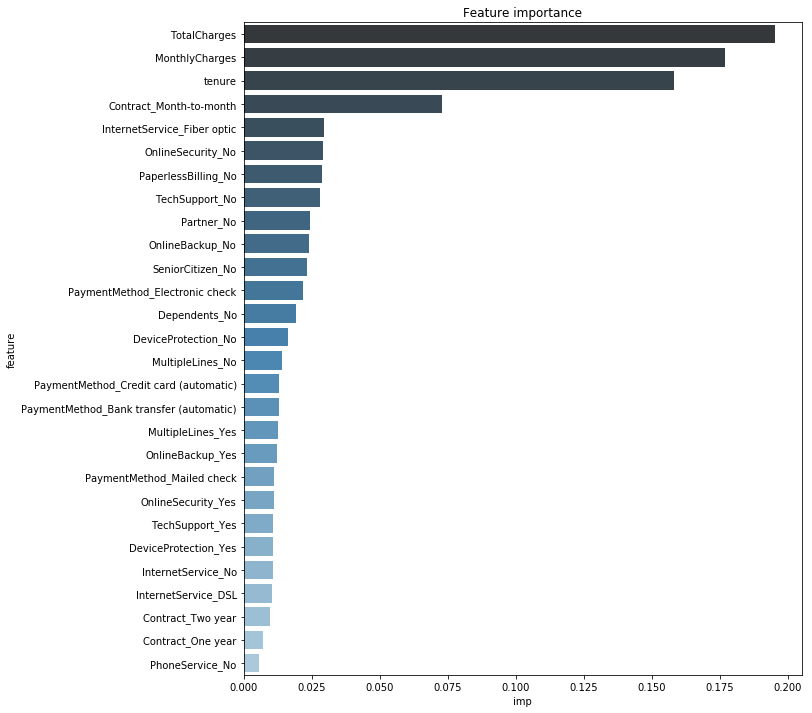

In [38]:
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(x='imp',y='feature',data=imp, palette="Blues_d", orient='h')

The above plot agrees with our EDA: tenure, charges, fibe optics seem to have a higher churn rate whereas dependents, security, support don't effect churn by a lot.
The features that have low importance can be removed. In addition to that, that redundant features are removed for eg; Gender_Male and Gender_Female are not needed as Gender_Male implies the Gender_Female has a value '0'.
Lastly, a new feature of difference between charges is added which is the difference between Total Charges and product of Monthhly Charges and Tenure

In [39]:
drop_columns = ['OnlineSecurity_No', 'OnlineBackup_No','DeviceProtection_No', 
                'TechSupport_No', 'SeniorCitizen_No','Partner_No', 'Dependents_No',
                'PhoneService_No','MultipleLines_No', 'PaperlessBilling_No']

df_dummies = df_dummies.drop(df_dummies[drop_columns], axis=1)
df_dummies['charge difference'] = df_dummies['TotalCharges']-(df_dummies['MonthlyCharges']*df_dummies['tenure'])

### 4.2 Resampling Data <a id='4.2'></a>

Since the data is so imbalanced, we can undersample the non churn cases to see if it improves the accuracy by preventing overfitting of the models

In [40]:
df_dummies.head()

,tenure,MonthlyCharges,TotalCharges,Churn,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,charge difference
0,1,29.85,29.85,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0.00
1,34,56.95,1889.50,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,-46.80
2,2,53.85,108.15,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0.45
3,45,42.30,1840.75,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,-62.75
4,2,70.70,151.65,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,10.25


In [41]:
df_dummies.loc[df_dummies['Churn']==1].count()

tenure                                     1869
MonthlyCharges                             1869
TotalCharges                               1869
Churn                                      1869
MultipleLines_Yes                          1869
InternetService_DSL                        1869
InternetService_Fiber optic                1869
InternetService_No                         1869
OnlineSecurity_Yes                         1869
OnlineBackup_Yes                           1869
DeviceProtection_Yes                       1869
TechSupport_Yes                            1869
Contract_Month-to-month                    1869
Contract_One year                          1869
Contract_Two year                          1869
PaymentMethod_Bank transfer (automatic)    1869
PaymentMethod_Credit card (automatic)      1869
PaymentMethod_Electronic check             1869
PaymentMethod_Mailed check                 1869
charge difference                          1869
dtype: int64

In [42]:
shuffled_df = df_dummies.sample(frac=1,random_state=42)
churn_df = shuffled_df.loc[shuffled_df['Churn']==1]

#Randomly selecting 1869 non churned customer data to balance the data
not_churn_df = shuffled_df.loc[shuffled_df['Churn']==0].sample(n=1869,random_state=42)

balanced_df = pd.concat([churn_df,not_churn_df])

balanced_df = balanced_df.sample(frac=1,random_state=42)

Text(0.5, 1.1, 'Balanced Data')

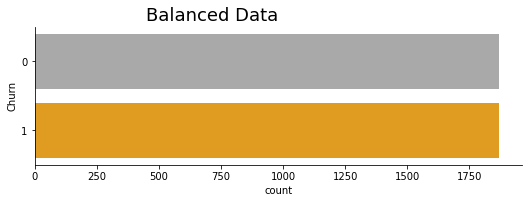

In [43]:
sns.catplot(kind ='count', y='Churn',data=balanced_df,height=2.5, aspect=3, palette =('darkgrey','orange'))
plt.title('Balanced Data', y=1.1, fontsize=18,ha='right')

### 4.3 Model Evaluation <a id='4.3'></a>

Firstly, the features are normalized using a min-max scaler within a range of 0 to 1.

In [44]:
new_x = balanced_df.drop(columns=['Churn'])
new_y = balanced_df['Churn'].values

In [45]:
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(new_x)
new_x = pd.DataFrame(scaler.transform(new_x))

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Features and target datasets are split into training and test data. A 20% test split is used.

In [46]:
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.2, random_state=42)

An XGBoost classifier is chosen and hyperparameters are tuned

Accuracy:  76.9


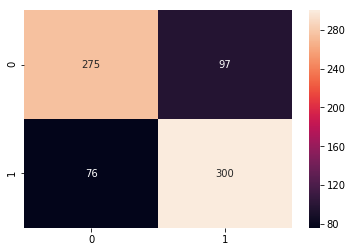

In [47]:
model = XGBClassifier(max_depth=7, learning_rate=0.01, n_estimators=200,subsample=1,colsample_bytree=1,gamma=1)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print ('Accuracy: ',((accuracy_score(y_test, predictions)*100).round(1)))
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True,fmt='g')

In [48]:
f1 = f1_score(y_test, predictions, average='weighted')
precision = precision_score(y_test, predictions, average='weighted')  
recall = recall_score(y_test, predictions, average='weighted')  
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

F1 Score: 0.7684993144173355
Precision: 0.7694972912042107
Recall: 0.7687165775401069


### 4.4 Predicting Customer Churn <a id='4.4'></a>

In [49]:
for i in range (1,10):
    predict = model.predict(new_x.iloc[[i]])
    if predict == 0:
        predict='No'
    else:
        predict='Yes'
    if new_y[i] == 0:
        real = 'No'
    else:
        real = 'Yes'
    print('Did the customer Churn?: {}; and the model predicted: {}'.format(real,predict))

Did the customer Churn?: Yes; and the model predicted: No
Did the customer Churn?: Yes; and the model predicted: Yes
Did the customer Churn?: Yes; and the model predicted: Yes
Did the customer Churn?: Yes; and the model predicted: Yes
Did the customer Churn?: Yes; and the model predicted: Yes
Did the customer Churn?: Yes; and the model predicted: Yes
Did the customer Churn?: Yes; and the model predicted: Yes
Did the customer Churn?: No; and the model predicted: No
Did the customer Churn?: No; and the model predicted: Yes


The model seems to do well!
***